In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

In [ ]:
# Importing File
raw_data = pd.read_csv('/content/drive/MyDrive/Project_placement/RUL/CMaps/train_FD001.txt',sep=' ', header = None)
raw_data

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [ ]:
raw_data = raw_data.drop([26,27], axis='columns')
raw_data

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640




* Column 1: Corresponds to engine number (This column is indexed 0 above because of Python's numbering convention)
* Column 2: Corresponds to cycle number. If engine 1 fails after 192 cycles, the entries of second column for engine 1 will go from 1 to 192. Similarly for other engines.
* Columns 3,4,5: 3 operational settings
* Columns 6-26: 21 sensor measurements



In [ ]:
raw_data.columns = ['ID', 'Cycle', 'OpSet1', 'OpSet2', 'OpSet3', 'SensorMeasure1', 'SensorMeasure2', 'SensorMeasure3', 'SensorMeasure4', 'SensorMeasure5', 'SensorMeasure6', 'SensorMeasure7', 'SensorMeasure8', 'SensorMeasure9', 'SensorMeasure10', 'SensorMeasure11', 'SensorMeasure12', 'SensorMeasure13', 'SensorMeasure14', 'SensorMeasure15', 'SensorMeasure16', 'SensorMeasure17', 'SensorMeasure18', 'SensorMeasure19', 'SensorMeasure20', 'SensorMeasure21']
raw_data.head(100)

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,96,-0.0034,0.0001,100.0,518.67,642.19,1584.07,1395.16,14.62,...,521.66,2388.06,8130.69,8.4311,0.03,392,2388,100.0,38.88,23.3255
96,1,97,0.0035,-0.0003,100.0,518.67,642.07,1595.77,1407.81,14.62,...,521.67,2388.06,8128.74,8.4105,0.03,392,2388,100.0,39.01,23.2963
97,1,98,0.0006,0.0004,100.0,518.67,642.00,1591.11,1404.56,14.62,...,522.31,2388.06,8127.89,8.4012,0.03,391,2388,100.0,38.96,23.2554
98,1,99,-0.0005,-0.0000,100.0,518.67,642.46,1592.73,1406.13,14.62,...,521.42,2388.10,8131.77,8.4481,0.03,393,2388,100.0,38.82,23.2323


In [ ]:
raw_data[raw_data['ID'] == 1]

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0
321,1,41.9998,0.8400,100.0,445.00,548.99,1341.82,1113.16,3.91,5.71,...,2387.98,8082.37,9.3300,0.02,331,2212,100.00,10.77,6.2894,0
620,1,20.0064,0.7005,100.0,491.19,606.99,1481.38,1244.70,9.35,13.63,...,2388.09,8061.99,9.1575,0.02,364,2324,100.00,24.50,14.6715,0
927,1,20.0029,0.7000,100.0,491.19,607.40,1488.27,1242.08,9.35,13.65,...,2388.14,8062.07,9.2201,0.02,364,2324,100.00,24.61,14.6695,0
1201,1,10.0014,0.2500,100.0,489.05,605.16,1495.18,1313.85,10.52,15.49,...,2388.17,8117.05,8.6631,0.03,369,2319,100.00,28.52,17.1688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60233,1,0.0016,0.0001,100.0,518.67,641.70,1583.12,1398.14,14.62,21.61,...,2388.07,8130.34,8.3608,0.03,391,2388,100.00,39.09,23.4580,0
60438,1,35.0058,0.8406,100.0,449.44,554.97,1361.40,1125.89,5.48,8.00,...,2387.79,8055.93,9.3569,0.02,335,2223,100.00,14.86,8.8137,0
60599,1,10.0013,0.2517,100.0,489.05,604.14,1489.77,1288.58,10.52,15.45,...,2387.77,8114.10,8.6402,0.03,367,2319,100.00,28.59,17.0784,0
60810,1,25.0009,0.6214,60.0,462.54,536.45,1253.90,1049.70,7.05,9.03,...,2028.14,7868.79,10.8801,0.02,307,1915,84.93,14.38,8.5856,0


In [ ]:
# Making an array which contains EOL of all the Ids
EOL=[]
for sl_no in raw_data['ID']:
        EOL.append( ((raw_data[raw_data['ID'] == sl_no]["Cycle"]).values)[-1])

In [ ]:
# Append the "EOL" column
raw_data["EOL"]=EOL

In [ ]:
raw_data.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,321
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,321
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,321
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,321
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,321


## Classification Problem Formulation
The challange of this competetion was to predict the Remaining Useful Life of the engine by using the given sensor's data and operational conditions.

But in this project, we ll try to simplify that by converting it to a Classification Problem. Where, the classes/labels will of 3 types, i.e. Good Condition, Moderate Condition and Warning Condition.

**Labels corresponding to each conditions**


*   Good Condition - 0
*   Moderate Condition - 1
*   Warning Condition - 2

**Defining the labels**

Here we will define the engine's condition with Life Ratio (LR), which is the ratio between Current Cycle and the End cycle/ End of Life(EOL). If LR=0, that means the component has just started its degradation and LR=1 means, it is completely degraded.

* if LR <= 0.6 - Good Condition
* if 0.6 < LR <= 0.8 - Moderate Condition
* if 0.8 < LR - Warning Condition


In [ ]:
# Calculate "LR"
raw_data["LR"] = raw_data["Cycle"]/ raw_data["EOL"]

In [ ]:
raw_data.head()

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,EOL,LR
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,321,0.003115
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,321,0.006231
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,321,0.009346
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,321,0.012461
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,321,0.015576


In [ ]:
# Drop ID and EOL
raw_data=raw_data.drop(columns=['ID','EOL'])

In [ ]:
raw_data.head()

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,LR
0,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0.003115
1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,0.006231
2,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,0.009346
3,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,0.012461
4,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,0.015576


In [ ]:
labels=[]
for i in range (0,len(raw_data)):
    if np.array(raw_data["LR"])[i] <= 0.6:
        labels.append(0)
    elif np.array(raw_data["LR"])[i] <= 0.8 :
        labels.append(1)
    else :
        labels.append(2)

raw_data["labels"]=labels
raw_data  = raw_data.drop(columns=['LR'])
raw_data

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,5.70,...,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670,0
1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,13.61,...,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552,0
2,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,5.69,...,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213,0
3,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,5.70,...,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176,0
4,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,9.00,...,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,...,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234,2
61245,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,...,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151,2
61246,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,...,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270,2
61247,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,...,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774,2


# Making Training Data-set
Now the classification data-set is all set, with 25 Features and 1 label/class column, containing 3 classes.

It can be saved in a .csv file to access it in any other notebook. Similarly all the 4 Training data were converted into this format and saved as .csv file.

In [ ]:
save_path = '/content/drive/MyDrive/Project_placement/RUL/CMaps/Training_1_all_features.csv'
raw_data.to_csv(save_path, index=False)

Importing all the Training Data-sets

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project_placement/RUL/CMaps/Training_1_all_features.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Project_placement/RUL/CMaps/Training_2_all_features.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Project_placement/RUL/CMaps/Training_3_all_features.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Project_placement/RUL/CMaps/Training_4_all_features.csv')

In [ ]:
df = pd.concat([df1,df2,df3,df4])
df

,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,...,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,labels
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,0
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,0
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,0
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,0
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,15.46,...,2388.73,8185.69,8.4541,0.03,372,2319,100.0,29.11,17.5234,2
61245,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,21.57,...,2388.46,8185.47,8.2221,0.03,396,2388,100.0,39.38,23.7151,2
61246,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,21.57,...,2388.48,8193.94,8.2525,0.03,395,2388,100.0,39.78,23.8270,2
61247,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,7.96,...,2388.83,8125.64,9.0515,0.02,337,2223,100.0,15.26,9.0774,2


In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

0.8930531304564729

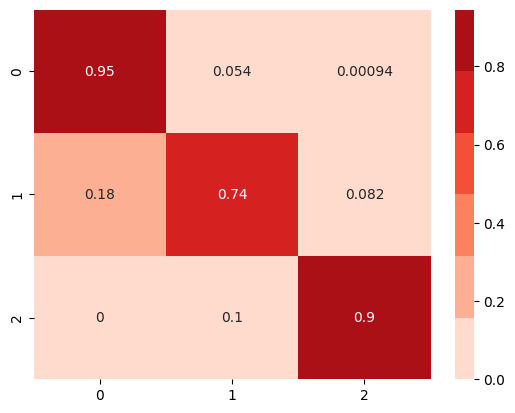

In [ ]:
y_pred_RF = RF.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true'))
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)

In [ ]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#Randomized Search with cross validation for Hyperparameter optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators=[200, 400, 300]
# Maximum number of levels in tree
max_depth= [10, 20, 30]
# Max number of samples given to each tree
max_samples= [0.2,0.3,0.4 ]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_samples': max_samples}
print(random_grid)

{'n_estimators': [200, 400, 300], 'max_depth': [10, 20, 30], 'max_samples': [0.2, 0.3, 0.4]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv = 3,n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_samples': [0.2, 0.3, 0.4],
                                        'n_estimators': [200, 400, 300]})

In [ ]:
print(rf_random.best_params_)
print(rf_random.best_score_)

{'n_estimators': 400, 'max_samples': 0.4, 'max_depth': 30}
0.8898789455328443


0.8940508855076079

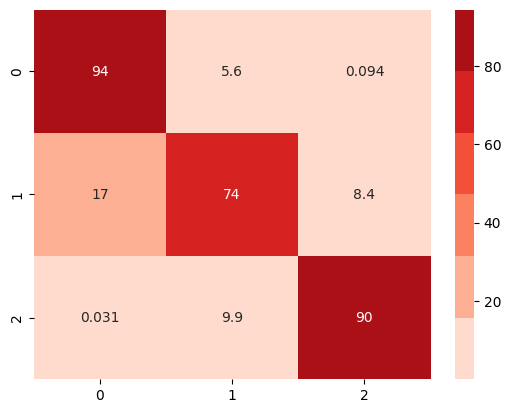

In [ ]:
RF_randSer = RandomForestClassifier(n_estimators=400,max_samples=0.4,max_depth= 30)
RF_randSer.fit(X_train, y_train)
y_pred_RF = RF_randSer.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)




# Testing on given Test-Dataset

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Project_placement/RUL/CMaps/Test_classification_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Project_placement/RUL/CMaps/Test_classification_2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Project_placement/RUL/CMaps/Test_classification_3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Project_placement/RUL/CMaps/Test_classification_4.csv')

test_df = pd.concat([df1,df2,df3,df4])

X_test = test_df.iloc[:,0:-1]
y_test = test_df.iloc[:,-1]

0.9071374777162359

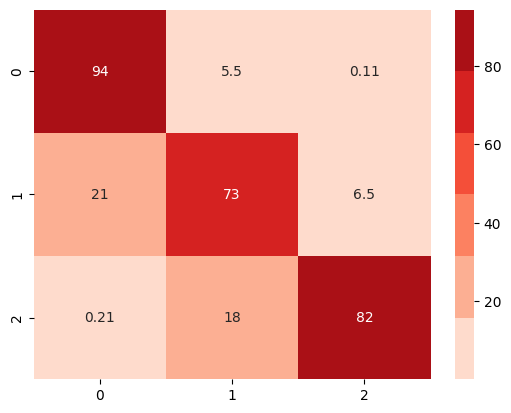

In [ ]:
y_pred_RF = RF_randSer.predict(X_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred_RF, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)

accuracy_score(y_test, y_pred_RF)